In [2]:
from fastai.vision.all import *
import fastai
import timm
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

/grupoa/config/miniconda3/envs/fastai/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [3]:
import torch
torch.cuda.set_device(1)

In [4]:
df = pd.read_csv('data/wheat_new.csv',decimal=',')

In [5]:
name = 'swinv2_cr_base_384'

In [6]:
df

,Unnamed: 0,file,DAS,plot nº,photo nº,species,water_treatment,management,plot m2,avg_water (L m-2),...,P (kg microplot-1),K (kg microplot-1),avg_height,GA,GGA,CSI,NGRDIveg,TGIveg,final yield (kg),dataset
0,0,20220517_1 (1).JPG,96,1,(1).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.959407,0.904393,5.734098,0.1324,2569.2709,9.15,train
1,1,20220517_1 (2).JPG,96,1,(2).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.963030,0.905523,5.971505,0.1316,2648.0105,9.15,train
2,2,20220517_1 (3).JPG,96,1,(3).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.953708,0.898722,5.765430,0.1331,2736.4337,9.15,train
3,3,20220517_1 (4).JPG,96,1,(4).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.957117,0.898772,6.095965,0.1267,2550.8238,9.15,train
4,4,20220602_1 (1).JPG,112,1,(1).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.892348,0.791199,11.335180,0.1008,1880.2128,9.15,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,251,20220615_25 (4).JPG,125,25,(4).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.788544,0.323428,58.984136,0.0491,2277.6824,7.95,test
252,252,20220701_25 (1).JPG,141,25,(1).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.031868,0.009072,71.532905,0.0342,946.1760,7.95,test
253,253,20220701_25 (2).JPG,141,25,(2).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.025828,0.006849,73.483356,0.0314,867.4491,7.95,test
254,254,20220701_25 (3).JPG,141,25,(3).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.022065,0.004773,78.367629,0.0196,855.3556,7.95,test


In [7]:
scaler = MinMaxScaler()

In [8]:
df.columns

Index(['Unnamed: 0', 'file', 'DAS', 'plot nº', 'photo nº', 'species',
       'water_treatment', 'management', 'plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)', 'dataset'],
      dtype='object')

In [9]:
dftrain = df[(df.dataset=='train')]
# dftrain.loc[:,['plot m2', 'avg_water (L m-2)',
#        'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
#        'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
#        'final yield (kg)']] = scaler.fit_transform(dftrain[['plot m2', 'avg_water (L m-2)',
#        'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
#        'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
#        'final yield (kg)']])
dfvalid = df[(df.dataset=='validation')]
dftest = df[(df.dataset=='test')]
# dfvalid.loc[:,['plot m2', 'avg_water (L m-2)',
#        'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
#        'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
#        'final yield (kg)']] = scaler.transform(dfvalid[['plot m2', 'avg_water (L m-2)',
#        'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
#        'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
#        'final yield (kg)']])        
# dftest.loc[:,['plot m2', 'avg_water (L m-2)',
#        'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
#        'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
#        'final yield (kg)']] = scaler.transform(dftest[['plot m2', 'avg_water (L m-2)',
#        'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
#        'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
#        'final yield (kg)']])                   

In [10]:
dftrain = pd.concat([dftrain,dfvalid])

In [11]:
df = pd.concat([dftrain,dftest])

In [12]:
dftrain.loc[:,'dataset'] =  dftrain['dataset'].apply(lambda x: x=='validation')
df.loc[:,'dataset'] =  df['dataset'].apply(lambda x: x=='test')

In [13]:
# dftrain.loc[:,'final yield (kg)'] = dftrain['final yield (kg)'].apply(lambda x : (x - 0.8579)/(10.55-0.8579))
# df.loc[:,'final yield (kg)'] = df['final yield (kg)'].apply(lambda x : (x - 0.8579)/(10.55-0.8579))

In [14]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    # EarlyStoppingCallback(patience=5),
    SaveModelCallback(fname=name+'_No_WNPK_new'), #convnext_yield_all_minmax
    # ReduceLROnPlateau()
]

In [15]:
from fastai.metrics import mae,rmse,mse

In [16]:
db = DataBlock(blocks = (ImageBlock,
                         RegressionBlock(),RegressionBlock(),RegressionBlock(),
                         RegressionBlock(),RegressionBlock(),RegressionBlock()),
                 get_x=[ColReader('file',pref='wheat_all/'),
                    
                        ],
                 get_y=[#ColReader('species'),
                        #ColReader('water_treatment'),
                        #ColReader('management'),
                        #ColReader('plot m2'),
                        #ColReader('avg_height'),
                        #ColReader('avg_water (L m-2)'),
                        #ColReader('N (kg microplot-1)'),
                        #ColReader('P (kg microplot-1)'),
                        #ColReader('K (kg microplot-1)'),
                        
                        ColReader('GA'),
                        ColReader('GGA'),
                        ColReader('CSI'),
                        ColReader('NGRDIveg'),
                        ColReader('TGIveg'),
                     ColReader('final yield (kg)')],
                 splitter=ColSplitter(col='dataset'),    
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384,flip_vert=True,
                                            max_zoom=1.0), Normalize.from_stats(*imagenet_stats)],
               n_inp=1)
dls = db.dataloaders(dftrain,bs=4)

In [17]:
class MultiInputModel(Module):
  "A three-headed model given a `body` and `n` output features"
  def __init__(self, body:nn.Sequential):
    nf = 1024
    self.body = body
    #self.water_treatment = create_head(nf, 4)
    #self.management = create_head(nf, 2)
    self.avg_water = create_head(nf,1)
    self.n = create_head(nf,1)
    self.p = create_head(nf,1)
    self.k = create_head(nf,1)
    self.avg_height = create_head(nf,1)
    self.ga = create_head(nf,1)
    self.gga = create_head(nf,1)
    self.csi = create_head(nf,1)
    self.NGRDIveg = create_head(nf,1)
    self.TGIveg = create_head(nf,1)
    self.yieldprod = create_head(nf,1)

    
    
  
  def forward(self, x):
    y = self.body(x)
    return [
        #self.water_treatment(y),
        #self.management(y),
        self.avg_water(y),
        self.n(y),
        self.p(y),
        self.k(y),
        self.avg_height(y),
        self.ga(y),
        self.gga(y),
        self.csi(y),
        self.NGRDIveg(y),
        self.TGIveg(y),
        self.yieldprod(y)]

In [18]:
model = timm.create_model(name,num_classes=1,pretrained=True)
body = nn.Sequential(*list(model.children())[:-1])
net = MultiInputModel(body)

/home/joheras/.local/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
No pretrained weights exist or were found for this model. Using random initialization.


In [24]:
class CombinationLoss(Module):
    "Cross Entropy Loss on multiple targets"
    def __init__(self, func1=F.cross_entropy,func2=F.mse_loss, weights=[2, 1]):
        self.func1, self.func2, self.w = func2, func2, weights

    def forward(self, xs, *ys, reduction='mean'):
        res = self.func2(ys[0],torch.reshape(xs[0],(4,1)))
        for i in range(1,5):
            res = res + self.func2(ys[i],torch.reshape(xs[i],(4,1)))
        res = res + self.func2(ys[5],torch.reshape(xs[5],(4,1)))
        return res
    

In [25]:
learn = Learner(dls, net, loss_func=CombinationLoss(),cbs=callbacks)

In [26]:
# learn.lr_find()

In [27]:
learn.freeze()

epoch,train_loss,valid_loss,time
0,8317992.000000,8158093.500000,00:16
1,8070315.500000,8157247.000000,00:16
2,8133196.000000,8157171.500000,00:16
3,8147283.000000,8157809.000000,00:15
4,8190016.000000,8156064.500000,00:16
5,8237627.000000,8155118.500000,00:16
6,8266515.000000,8153953.500000,00:16
7,8278939.000000,8148402.000000,00:16
8,8154880.500000,8144760.500000,00:16
9,8195165.500000,8137714.500000,00:16


/tmp/ipykernel_2095463/2346873955.py:7: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = self.func2(ys[0],torch.reshape(xs[0],(4,1)))
/tmp/ipykernel_2095463/2346873955.py:9: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = res + self.func2(ys[i],torch.reshape(xs[i],(4,1)))
/tmp/ipykernel_2095463/2346873955.py:10: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = res + self.func2(ys[5],torch.reshape(xs[5],(4,1)))


Better model found at epoch 0 with valid_loss value: 8158093.5.


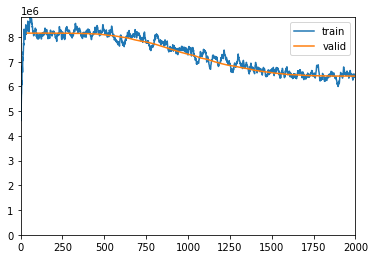

Better model found at epoch 1 with valid_loss value: 8157247.0.
Better model found at epoch 2 with valid_loss value: 8157171.5.
Better model found at epoch 4 with valid_loss value: 8156064.5.
Better model found at epoch 5 with valid_loss value: 8155118.5.
Better model found at epoch 6 with valid_loss value: 8153953.5.
Better model found at epoch 7 with valid_loss value: 8148402.0.
Better model found at epoch 8 with valid_loss value: 8144760.5.
Better model found at epoch 9 with valid_loss value: 8137714.5.
Better model found at epoch 10 with valid_loss value: 8127249.5.
Better model found at epoch 11 with valid_loss value: 8111291.5.
Better model found at epoch 12 with valid_loss value: 8073002.0.
Better model found at epoch 13 with valid_loss value: 8049145.0.
Better model found at epoch 14 with valid_loss value: 8002504.5.
Better model found at epoch 15 with valid_loss value: 7963393.5.
Better model found at epoch 16 with valid_loss value: 7890198.0.
Better model found at epoch 17 wi

In [28]:
learn.fit_one_cycle(50,lr_max=1e-3)

In [29]:
learn.unfreeze()

epoch,train_loss,valid_loss,time
0,6389515.500000,6421345.000000,00:16
1,6443044.000000,6421000.000000,00:16
2,6382897.500000,6408898.000000,00:17
3,6419179.000000,6411711.000000,00:17
4,6368372.000000,6407153.500000,00:16
5,6246947.000000,6403651.500000,00:16
6,6366990.000000,6393221.000000,00:16
7,6272481.500000,6386196.000000,00:16
8,6410396.500000,6377378.500000,00:16
9,6423867.000000,6363832.000000,00:16


/tmp/ipykernel_2095463/2346873955.py:7: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = self.func2(ys[0],torch.reshape(xs[0],(4,1)))
/tmp/ipykernel_2095463/2346873955.py:9: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = res + self.func2(ys[i],torch.reshape(xs[i],(4,1)))
/tmp/ipykernel_2095463/2346873955.py:10: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = res + self.func2(ys[5],torch.reshape(xs[5],(4,1)))


Better model found at epoch 0 with valid_loss value: 6421345.0.


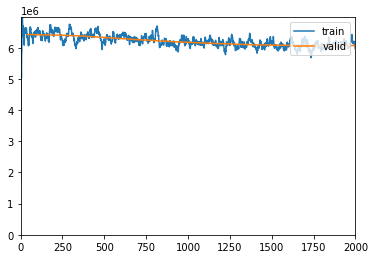

Better model found at epoch 1 with valid_loss value: 6421000.0.
Better model found at epoch 2 with valid_loss value: 6408898.0.
Better model found at epoch 4 with valid_loss value: 6407153.5.
Better model found at epoch 5 with valid_loss value: 6403651.5.
Better model found at epoch 6 with valid_loss value: 6393221.0.
Better model found at epoch 7 with valid_loss value: 6386196.0.
Better model found at epoch 8 with valid_loss value: 6377378.5.
Better model found at epoch 9 with valid_loss value: 6363832.0.
Better model found at epoch 10 with valid_loss value: 6347871.0.
Better model found at epoch 11 with valid_loss value: 6339167.5.
Better model found at epoch 12 with valid_loss value: 6322419.5.
Better model found at epoch 13 with valid_loss value: 6308245.5.
Better model found at epoch 14 with valid_loss value: 6292247.5.
Better model found at epoch 15 with valid_loss value: 6281982.5.
Better model found at epoch 16 with valid_loss value: 6263437.0.
Better model found at epoch 17 wi

In [30]:
learn.fit_one_cycle(50,lr_max=1e-4)

In [31]:
dls = db.dataloaders(df,bs=4)
learn.dls=dls

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
preds,gt = learn.get_preds()

/tmp/ipykernel_2095463/2346873955.py:7: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = self.func2(ys[0],torch.reshape(xs[0],(4,1)))
/tmp/ipykernel_2095463/2346873955.py:9: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = res + self.func2(ys[i],torch.reshape(xs[i],(4,1)))
/tmp/ipykernel_2095463/2346873955.py:10: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = res + self.func2(ys[5],torch.reshape(xs[5],(4,1)))


In [34]:
print(gt[-1])

tensor([ 2.4077,  2.4077,  2.4077,  2.4077,  2.4077,  2.4077,  2.4077,  2.4077,
         2.4077,  2.4077,  2.4077,  2.4077,  2.4077,  2.4077,  2.4077,  2.4077,
        11.3500, 11.3500, 11.3500, 11.3500, 11.3500, 11.3500, 11.3500, 11.3500,
        11.3500, 11.3500, 11.3500, 11.3500, 11.3500, 11.3500, 11.3500, 11.3500,
         1.7521,  1.7521,  1.7521,  1.7521,  1.7521,  1.7521,  1.7521,  1.7521,
         1.7521,  1.7521,  1.7521,  1.7521,  1.7521,  1.7521,  1.7521,  1.7521,
         7.9500,  7.9500,  7.9500,  7.9500,  7.9500,  7.9500,  7.9500,  7.9500,
         7.9500,  7.9500,  7.9500,  7.9500,  7.9500,  7.9500,  7.9500,  7.9500])


In [35]:
mean_absolute_error(gt[-1],preds[-1])

5.744853

In [36]:
mean_squared_error(gt[-1],preds[-1])

47.780228

In [37]:
math.sqrt(mean_squared_error(gt[-1],preds[-1]))

6.912324331303676